# Section 2: Simulation

We simulate attacks on the darknet network, using targeted or random attacks. We try to see how do key network metrics, such as centrality measures, community size and connectivity change when the most central nodes are removed from the network, compared to random removals. Our narrative is helping the police in tackling the ever lasting difficulties of taking down illicit websites. We also implement recoveries, where nodes have certain chances to come back based on different criteria. We measure different metrics during the simulation and plot them in the end to gain insight into the effectivness of our attacks.

In [1]:
# Imports 
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # this adds the src folder to path so we can import utils
from src import utils
from src.simulation import NetworkAttackSimulation
import importlib
importlib.reload(utils); # reload utils to get latest changes

nodes, edges = utils.load_data() # load data using our function
G = nx.from_pandas_edgelist(edges, source='Source', target='Target', create_using=nx.DiGraph) 
     


We use `NetworkAttackSimulation` class. It runs iterations where it attacks some nodes, then it has a chance to recover some. After it measures the state of the current graph and stores it. After all the iterations it plots the changes in the metrics of the graph during the iterations.

It has the following important attributes:

- `graph`: the used DiGraph for the attacks.
- `type_of_attack`: the desired type of attack used in the simulation. Can be `random` or `targeted`.
- `type_of_recovery`: the desired type of recovery used in the simulation. Can be `uniform`, `weighted` or `none`.
- `nume_of_iter`: the number of iterations run. An iterations looks like this: attack-> recover-> measure metrics.
- `metric`: the metric used for targeted attack and for weighted recovery.
- `random_seed`: seed used.
- `recovery_scale`: multiplies the normalized metric when using weighted recovery. Usually the normalized metrics are 0.01>.
- `recovery_prob`: the probability of a removed node to recover, when using uniform recovery.
- `recovery_edge_type`: the desired type of recovery method used for edges. Can be `realistic`, `original`, `random` or `none`.
- `metric_interval`: the intervals at which measuring the state of the graph should take place.
- `recovery_interval`: the intervals at which recovery takes places.

In [4]:
simulation = NetworkAttackSimulation(graph=G, 
                                     type_of_attack="targeted", 
                                     type_of_recovery="uniform", 
                                     recovery_edge_type="original",
                                     num_of_iter=10, 
                                     metric="pagerank", 
                                     #random_seed=42, 
                                     recovery_scale=10, 
                                     recovery_prob=0.01,
                                     recovery_interval=2,
                                     metric_interval=5,
                                     )   

2025-12-18 01:34:21,591 - INFO - Simulation reset to initial state.
2025-12-18 01:34:21,594 - INFO - Starting iteration 1/4...
2025-12-18 01:34:21,690 - DEBUG - Targeted attack removed nodes ['fhostingesps6bly'] by metric pagerank
2025-12-18 01:34:21,703 - DEBUG - Uniform recovery recovered nodes []
2025-12-18 01:35:05,386 - INFO - Iteration 1 | nodes=7177 edges=24895 removed=1 attacked=1 recovered=0
2025-12-18 01:35:05,386 - INFO - Starting iteration 2/4...
2025-12-18 01:35:05,437 - DEBUG - Targeted attack removed nodes ['blockchainbdgpzk'] by metric pagerank
2025-12-18 01:35:48,622 - INFO - Iteration 2 | nodes=7176 edges=24807 removed=2 attacked=1 recovered=0
2025-12-18 01:35:48,623 - INFO - Starting iteration 3/4...
2025-12-18 01:35:48,680 - DEBUG - Targeted attack removed nodes ['shopsat2dotfotbs'] by metric pagerank
2025-12-18 01:35:48,682 - DEBUG - Uniform recovery recovered nodes []
2025-12-18 01:36:40,354 - INFO - Iteration 3 | nodes=7175 edges=24750 removed=3 attacked=1 recove

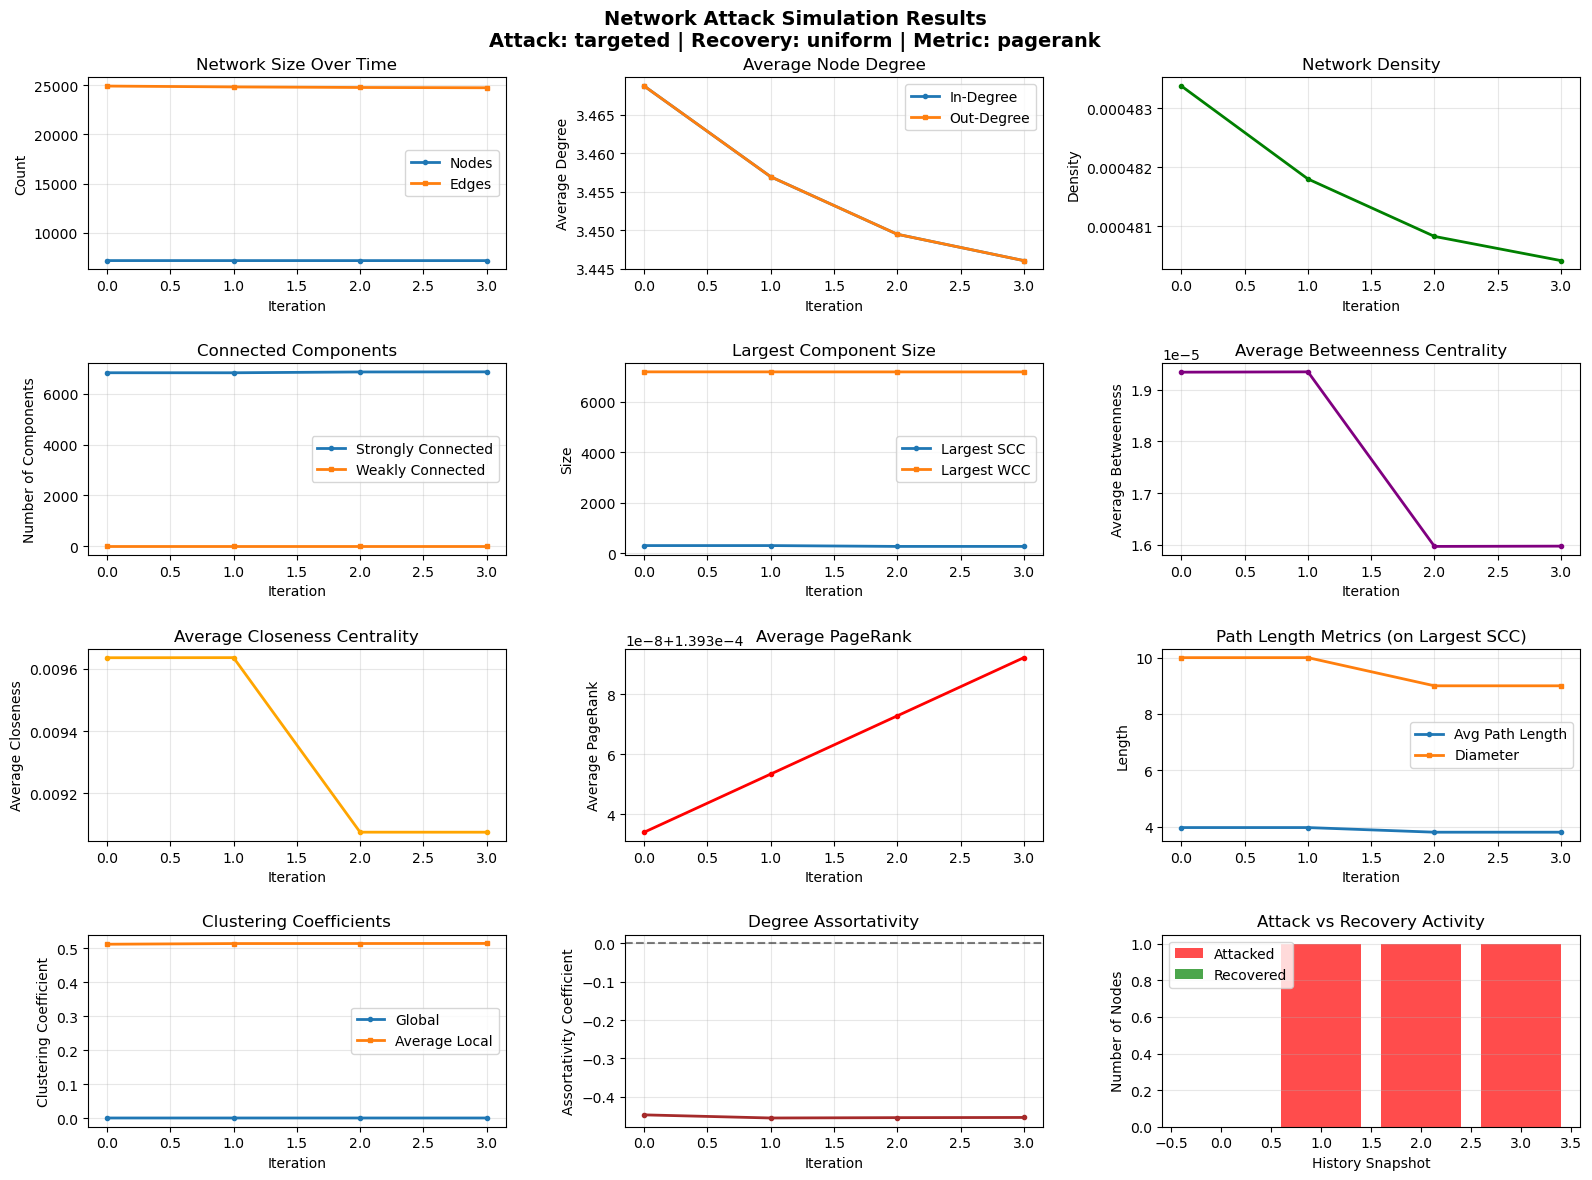


---Simulation Summary---
Initial nodes: 7177
Final nodes: 7174
Initial edges: 24895
Final edges: 24722
Total nodes attacked: 4
Total nodes recovered: 0
Net nodes removed: 4


In [5]:
simulation.run()